# Comparing various models

In [1]:
from torch_state_control.analysis import AnalysisPresenter
from networks.simple_fc import SimpleFC
from networks.norm_fc import NormFC

network = SimpleFC()
#network = NormFC()

## SimpleFC

`SimpleFC` consists of 2 fully connected layers.

Performance on Train set: -- 0.000049
Performance on Dev set: ---- 0.000086


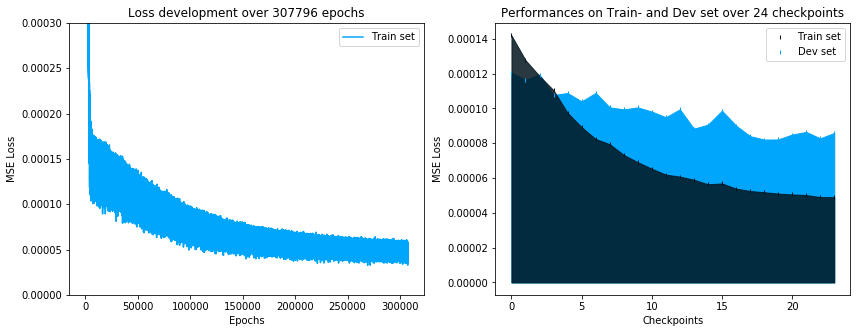

In [2]:
analyst = Analyst(name=network.name)
analyst.plot_analysis(metric='MSE Loss')

### Let's see how the network performs on our Test data

In [3]:
from datasets.one_hole_test import OneHoleTest

dataset = OneHoleTest(
    embedding_layers=7,
    currency='Euro',
    disjunct=True
)

network.load_latest_checkpoint()

In [ ]:
import torch
import itertools

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=1024,
    shuffle=False,
    drop_last=False
)

for batch_idx, sample_batched in enumerate(dataloader):
        x = torch.autograd.Variable(sample_batched['x'], requires_grad=True)
        y = torch.autograd.Variable(sample_batched['y'].float(), requires_grad=False)
        
        output = network.forward(x)
        losses = torch.nn.L1Loss(reduce=False)(output, y)

losses = [(index, loss.data[0]) for index, loss in enumerate(losses)]
losses = list(reversed(sorted(losses, key=lambda x: x[1])))

plt.grid()
plt.plot([loss for index, loss in losses])
plt.show()

fig = plt.figure(num=0, figsize=(13, 10))
fig.suptitle('Differences between the actual and the predicted graph', fontsize=22)
plot_sample(1, liszt[10][0])
plot_sample(2, liszt[25][0])
plot_sample(3, liszt[100][0])
plot_sample(4, liszt[150][0])
plt.show()

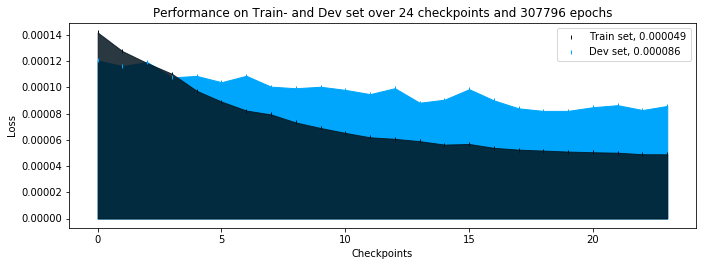

### Changelog

#### Checkpoint #0

one_hole_train embedding_layers=7 currency='Euro' disjunct=True batch_size=128 lr=0.001 momentum=0.7

In [2]:
analyst = AnalysisPresenter(name=network.name)
analyst.plot_analysis()